## Text Preprocessing
In this section, we preprocess the text data by normalizing it, removing stopwords, and lemmatizing the words. These steps help clean the text and prepare it for feature extraction.

In [159]:
# Importing necessary libraries
import pandas as pd
import string
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Download the stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/phyuphyuaung/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Importing Necessary Libraries
We begin by importing essential libraries for text preprocessing. This includes libraries for handling text data (Pandas), removing punctuation and numbers (string, re), stopword removal (NLTK), and lemmatization (WordNetLemmatizer).

In [160]:
# Load dataset
data = pd.read_csv('london_text_data.csv')

# Display the first few rows of the dataset
data.head()

,text,area
0,I love Al Mike's. The restaurant is hidden in ...,london
1,Love this place for its micro beers and spicy ...,london
2,Went for dinner and really enjoyed it. It was...,london
3,I haven't been to this place in a VERY LONG t...,london
4,Brevard Court is good for an inexpensive lunch...,london


### Loading the Data
The dataset is loaded using Pandas. We assume the dataset is in CSV format and contains a column named 'text' that holds the text data to be preprocessed.

In [161]:
# Normalize text
def normalize_text(text):
    """
    Normalizes the input text by converting to lowercase, removing punctuation, URLs, and numbers.
    """
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    return text

# Apply normalization
data['clean_text'] = data['text'].apply(normalize_text)

### Normalization
Text normalization is performed to standardize the input data. This function converts all text to lowercase, removes punctuation, URLs, and numbers. This is an essential step in preparing the text for further analysis.

In [162]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
data['clean_text'] = data['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

### Removing Stopwords
Stopwords are common words that often do not contribute significant meaning to text analysis. Removing these words helps reduce noise in the data and improves the quality of features extracted during vectorization.

In [163]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
data['clean_text'] = data['clean_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

### Lemmatization
Lemmatization reduces words to their base or root form, which ensures that different forms of a word are analyzed as the same entity. This step is crucial for reducing variability in the data.

In [164]:
# Handle missing values and duplicates
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

### Handling Missing Values and Duplicates
To ensure data quality, rows with missing values are removed, and duplicate rows are dropped. This step is crucial to prevent biases and errors in the analysis.

In [165]:
# Display cleaned data
data.head()

# Save cleaned data if needed
# data.to_csv('cleaned_london_text_data.csv', index=False)  # Uncomment to save the cleaned data

,text,area,clean_text
0,I love Al Mike's. The restaurant is hidden in ...,london,love al mike restaurant hidden beautiful first...
1,Love this place for its micro beers and spicy ...,london,love place micro beer spicy crab soup london b...
2,Went for dinner and really enjoyed it. It was...,london,went dinner really enjoyed thursday night plac...
3,I haven't been to this place in a VERY LONG t...,london,havent place long time year ago regular spot r...
4,Brevard Court is good for an inexpensive lunch...,london,brevard court good inexpensive lunch nothing f...


## Feature Extraction
In this section, we convert the preprocessed text data into numerical features using TF-IDF vectorization. This step is essential for preparing the data for machine learning models.

In [166]:
# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['clean_text'])

### TF-IDF Vectorization
TF-IDF (Term Frequency-Inverse Document Frequency) is used to convert the cleaned text into numerical features. By limiting the number of features to 5000, we reduce dimensionality while keeping the most significant terms.

In [167]:
# Display the shape of the TF-IDF matrix
print("TF-IDF matrix shape:", X.shape)

# (Optional) Save the TF-IDF matrix if needed
# pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).to_csv('tfidf_features.csv', index=False)

TF-IDF matrix shape: (217, 5000)


## Integrating Area Data with Preprocessed Text Data
In this section, we integrate area information into the preprocessed text dataset. We ensure consistency between the area names in the area dataset and the preprocessed text data, then assign area names to the text data.

In [168]:

import random

### Importing Necessary Libraries
We import Pandas for data manipulation and Random for assigning area names randomly to the text data.

In [169]:
# Load the area dataset
london_area = pd.read_csv('london_area.csv')


### Loading the Area Dataset
We load the dataset containing area information (`london_area.csv`). This dataset will be used to assign area names to the preprocessed text data.

In [170]:
# Ensure the area column is consistent in the area dataset
london_area['area'] = london_area['area'].str.lower()

# Ensure the area column is present in the preprocessed text data
if 'area' not in data.columns:
    data['area'] = ''  # Initialize an empty column if not present

# Convert the area column in preprocessed text data to lowercase
data['area'] = data['area'].str.lower()


### Ensuring Consistency in Area Names
To avoid mismatches due to case sensitivity, we convert all area names to lowercase in both the area dataset and the preprocessed text data. This ensures that the area names are consistent and can be accurately assigned.

In [171]:
# List of unique areas
unique_areas = london_area['area'].unique()

# Randomly assign areas to the preprocessed text dataset
data['area'] = [random.choice(unique_areas) for _ in range(len(data))]


### Assigning Areas to the Preprocessed Text Dataset
We extract the unique area names from the area dataset and then randomly assign these areas to the preprocessed text data. This step ensures that each text entry is associated with a random area from the list.


In [172]:
# Save the updated dataset with area information
data.to_csv('london_text_area.csv', index=False)

# Display the first few rows of the updated dataset
data.head()


,text,area,clean_text
0,I love Al Mike's. The restaurant is hidden in ...,harrow,love al mike restaurant hidden beautiful first...
1,Love this place for its micro beers and spicy ...,hammersmith and fulham,love place micro beer spicy crab soup london b...
2,Went for dinner and really enjoyed it. It was...,ealing,went dinner really enjoyed thursday night plac...
3,I haven't been to this place in a VERY LONG t...,bromley,havent place long time year ago regular spot r...
4,Brevard Court is good for an inexpensive lunch...,harrow,brevard court good inexpensive lunch nothing f...


## Data Augmentation with Area Information
In this section, we augment the text data by appending area information to each text entry. We also replicate the dataset to ensure a sufficient number of samples for further analysis.


In [173]:
# Importing necessary libraries
import pandas as pd
import random


### Importing Necessary Libraries
We import Pandas for data manipulation and Random for generating area assignments during the data augmentation process.


In [174]:
# Function to augment text with area information
def augment_text_with_area(text, area):
    """
    Augments the given text by appending information about the area.
    """
    return f"{text} This review is about the {area} area."

# Apply the function to the preprocessed and integrated dataset
data['augmented_text'] = data.apply(lambda row: augment_text_with_area(row['clean_text'], row['area']), axis=1)


### Augmenting Text Data with Area Information
We define a function to append area information to each text entry. This augmented text helps provide context for the text data by linking it explicitly to the area being discussed. The function is then applied to each row in the dataset.


In [175]:
# Create an empty DataFrame to store augmented data
augmented_data = pd.DataFrame()

# Replicate and augment the dataset
num_replications = (1000 // len(data)) + 1
for _ in range(num_replications):
    temp_data = data.copy()
    temp_data['area'] = [random.choice(unique_areas) for _ in range(len(temp_data))]
    temp_data['augmented_text'] = temp_data.apply(
        lambda row: augment_text_with_area(row['clean_text'], row['area']), axis=1)
    augmented_data = pd.concat([augmented_data, temp_data], ignore_index=True)

# Ensure we have exactly 1000 rows in the final augmented dataset
augmented_data = augmented_data.head(1000)


### Data Replication for Augmentation
To ensure a sufficient number of samples, we replicate the dataset multiple times, each time reassigning area information randomly. This helps create a more diverse dataset by varying the area context within the text entries. We then trim the augmented dataset to 1000 rows to meet the desired sample size.


In [176]:
# Save the final augmented dataset if needed
# augmented_data.to_csv('augmented_data.csv', index=False)  # Uncomment to save the augmented data

# Display the first few rows of the augmented dataset
augmented_data.head()


,text,area,clean_text,augmented_text
0,I love Al Mike's. The restaurant is hidden in ...,city of london,love al mike restaurant hidden beautiful first...,love al mike restaurant hidden beautiful first...
1,Love this place for its micro beers and spicy ...,hackney,love place micro beer spicy crab soup london b...,love place micro beer spicy crab soup london b...
2,Went for dinner and really enjoyed it. It was...,merton,went dinner really enjoyed thursday night plac...,went dinner really enjoyed thursday night plac...
3,I haven't been to this place in a VERY LONG t...,camden,havent place long time year ago regular spot r...,havent place long time year ago regular spot r...
4,Brevard Court is good for an inexpensive lunch...,ealing,brevard court good inexpensive lunch nothing f...,brevard court good inexpensive lunch nothing f...


## Verification of Text Augmentation
In this section, we verify that the augmented text correctly includes the area information. We calculate the percentage of correctly augmented rows to ensure the accuracy of the data augmentation process.


In [177]:
# Function to check if the area information is correctly included in the augmented text
def check_augmentation(row):
    """
    Checks if the area name is correctly included in the augmented text.
    """
    area_in_text = row['area'] in row['augmented_text']
    return area_in_text

# Apply the check to each row in the augmented dataset
augmented_data['augmentation_correct'] = augmented_data.apply(check_augmentation, axis=1)


### Checking Augmentation Accuracy
We define a function `check_augmentation` that verifies if the area name is correctly included in the augmented text. This function is applied to each row in the augmented dataset, and a new column `augmentation_correct` is created to store the result (True/False).


In [178]:
# Calculate the percentage of correctly augmented rows
correct_augmentation_percentage = augmented_data['augmentation_correct'].mean() * 100
print(f"Correct Augmentation Percentage: {correct_augmentation_percentage:.2f}%")


Correct Augmentation Percentage: 100.00%


### Calculating the Accuracy of Augmentation
The accuracy of the text augmentation is calculated by determining the percentage of rows where the area information was correctly included in the augmented text. This percentage is printed to evaluate the effectiveness of the augmentation process.


## Data Analysis of Augmented Text Data
In this section, we perform basic statistical analysis of the augmented text data. We analyze the distribution of areas, and compare the lengths of the original and augmented text entries.


In [179]:
# Importing necessary libraries
import matplotlib.pyplot as plt


### Importing Necessary Libraries
We import Matplotlib for plotting graphs to visualize the distribution of areas and the text length distributions.


In [180]:
# Display basic statistics of the augmented dataset
print(augmented_data.describe())


                                                     text    area  \
count                                                1000    1000   
unique                                                217      33   
top     I love Al Mike's. The restaurant is hidden in ...  barnet   
freq                                                    5      45   

                                               clean_text  \
count                                                1000   
unique                                                217   
top     love al mike restaurant hidden beautiful first...   
freq                                                    5   

                                           augmented_text augmentation_correct  
count                                                1000                 1000  
unique                                                939                    1  
top     seen phantom london new york los angeles produ...                 True  
freq                    

### Basic Statistics of the Augmented Data
We first generate basic statistical summaries of the numerical columns in the augmented dataset. This provides an overview of the dataset, including counts, means, standard deviations, and other statistics.


barnet                    45
lewisham                  44
hackney                   43
southwark                 40
camden                    39
haringey                  38
brent                     37
hillingdon                36
wandsworth                36
kensington and chelsea    35
city of london            33
westminster               30
croydon                   30
newham                    30
enfield                   30
merton                    29
richmond upon thames      29
sutton                    28
tower hamlets             28
islington                 28
redbridge                 27
harrow                    27
lambeth                   27
kingston upon thames      27
havering                  26
hammersmith and fulham    26
bexley                    25
hounslow                  25
ealing                    23
bromley                   22
barking and dagenham      20
waltham forest            19
greenwich                 18
Name: area, dtype: int64


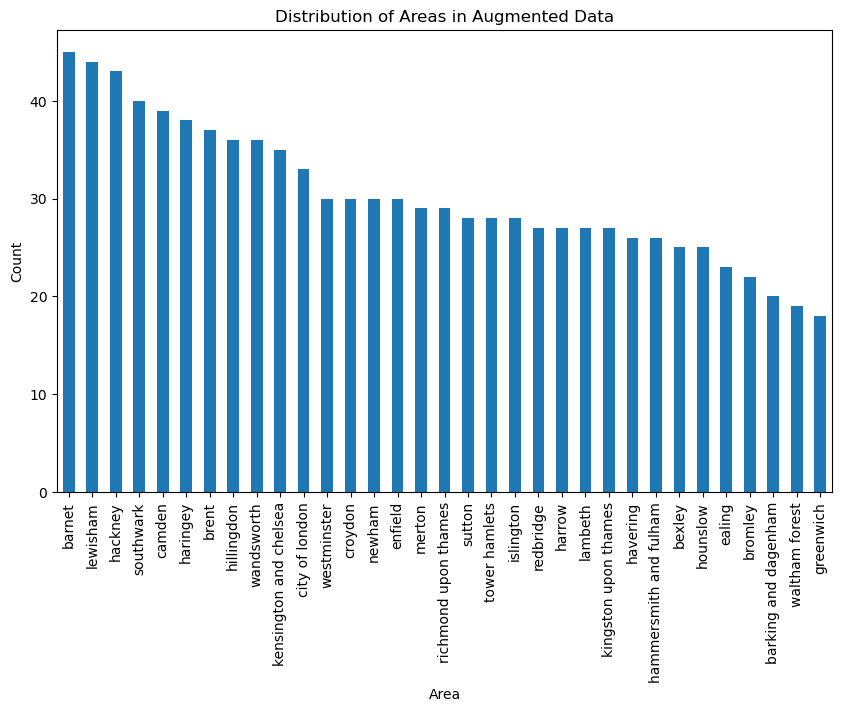

In [181]:
# Analyze the distribution of areas
area_counts = augmented_data['area'].value_counts()
print(area_counts)

# Plot the distribution of areas
plt.figure(figsize=(10, 6))
area_counts.plot(kind='bar')
plt.title('Distribution of Areas in Augmented Data')
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()


### Distribution of Areas in the Augmented Data
We calculate and display the distribution of area names within the augmented dataset. This is visualized using a bar chart to show how frequently each area appears in the data.


In [182]:
# Calculate text lengths for original and augmented text
augmented_data['original_text_length'] = augmented_data['text'].apply(len)
augmented_data['augmented_text_length'] = augmented_data['augmented_text'].apply(len)

# Display basic statistics for text lengths
print(augmented_data[['original_text_length', 'augmented_text_length']].describe())


       original_text_length  augmented_text_length
count           1000.000000             1000.00000
mean            1080.869000              706.99700
std              769.512381              473.68348
min               93.000000              103.00000
25%              536.000000              361.75000
50%              862.000000              583.50000
75%             1440.000000              948.25000
max             4269.000000             2446.00000


### Analysis of Text Lengths
We compute the length of the original and augmented text entries and display basic statistical summaries for these lengths. This analysis helps us understand the impact of augmentation on the text length.


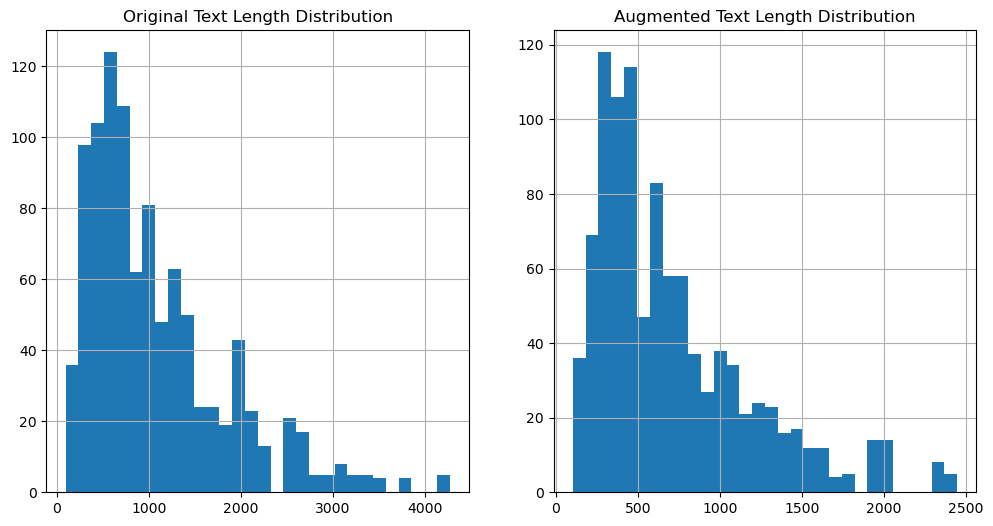

In [183]:
# Plot text length distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
augmented_data['original_text_length'].hist(bins=30)
plt.title('Original Text Length Distribution')

plt.subplot(1, 2, 2)
augmented_data['augmented_text_length'].hist(bins=30)
plt.title('Augmented Text Length Distribution')

plt.show()


### Plotting Text Length Distributions
We create histograms to visualize the distributions of text lengths for both the original and augmented text entries. This comparison highlights how the augmentation process has affected the overall length of the text data.


## Sentiment Analysis of Augmented Text Data
In this section, we perform sentiment analysis on the augmented text data using the `TextBlob` library. We calculate sentiment polarity scores, analyze the distribution of these scores, and visualize the sentiment distribution.


In [184]:
# Importing necessary libraries
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt


### Importing Necessary Libraries
We import Pandas for data manipulation, `TextBlob` for sentiment analysis, and Matplotlib for plotting the sentiment distribution.


In [185]:
# Function to get sentiment polarity
def get_sentiment(text):
    """
    Calculates the sentiment polarity of the given text using TextBlob.
    Sentiment polarity ranges from -1 (negative) to 1 (positive).
    """
    return TextBlob(text).sentiment.polarity


### Sentiment Analysis Function
We define a function `get_sentiment` that calculates the sentiment polarity of a given text. The sentiment polarity score ranges from -1 (indicating negative sentiment) to 1 (indicating positive sentiment).


In [186]:
# Apply sentiment analysis to the augmented text data
data['sentiment'] = data['augmented_text'].apply(get_sentiment)

# Display the first few rows with sentiment scores
print(data.head())


                                                text                    area  \
0  I love Al Mike's. The restaurant is hidden in ...                  harrow   
1  Love this place for its micro beers and spicy ...  hammersmith and fulham   
2  Went for dinner and really enjoyed it.  It was...                  ealing   
3  I haven't been to this place  in a VERY LONG t...                 bromley   
4  Brevard Court is good for an inexpensive lunch...                  harrow   

                                          clean_text  \
0  love al mike restaurant hidden beautiful first...   
1  love place micro beer spicy crab soup london b...   
2  went dinner really enjoyed thursday night plac...   
3  havent place long time year ago regular spot r...   
4  brevard court good inexpensive lunch nothing f...   

                                      augmented_text  sentiment  
0  love al mike restaurant hidden beautiful first...   0.297619  
1  love place micro beer spicy crab soup london b.

### Applying Sentiment Analysis to the Dataset
We apply the `get_sentiment` function to the `augmented_text` column of the dataset to calculate sentiment polarity scores. The resulting sentiment scores are stored in a new column `sentiment`, and the first few rows of the dataset are displayed to verify the results.


In [187]:
# Display basic statistics of sentiment scores
print(data['sentiment'].describe())


count    217.000000
mean       0.178402
std        0.170057
min       -0.387500
25%        0.076836
50%        0.172817
75%        0.285714
max        1.000000
Name: sentiment, dtype: float64


### Basic Statistics of Sentiment Scores
We generate and display basic statistical summaries for the sentiment polarity scores, including the mean, standard deviation, and distribution percentiles.


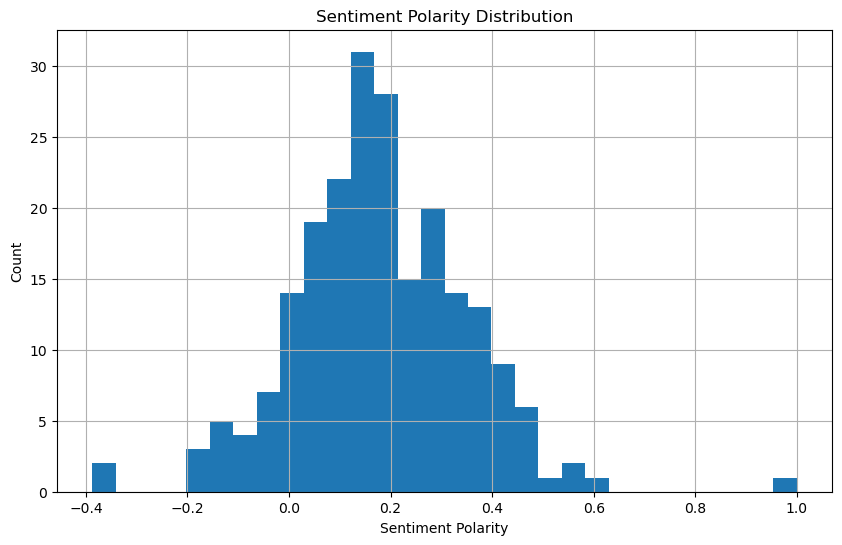

In [188]:
# Plot sentiment polarity distribution
plt.figure(figsize=(10, 6))
data['sentiment'].hist(bins=30)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.show()


### Plotting Sentiment Distribution
We create a histogram to visualize the distribution of sentiment polarity scores across the augmented text data. This plot helps us understand the overall sentiment trends within the dataset.


## Merging Sentiment Data with Housing Data
In this section, we merge the aggregated sentiment data with the housing dataset based on area information. This merged dataset will allow us to analyze the relationship between sentiment and housing prices in different areas.


In [189]:
# Importing necessary libraries
import pandas as pd


### Importing Necessary Libraries
We import Pandas for data manipulation and merging datasets.


In [190]:
# Load the housing dataset
housing_data = pd.read_csv('5combined_data_with_outliers_handled.csv')


### Loading the Housing Dataset
We load the housing dataset, which has been previously processed to handle outliers. This dataset contains housing prices and other relevant features.


In [191]:
# Aggregate sentiment data by area
aggregated_sentiment = data.groupby('area')['sentiment'].mean().reset_index()


### Aggregating Sentiment Data by Area
We aggregate the sentiment data by area, calculating the mean sentiment polarity score for each area. This aggregated data will be merged with the housing dataset to explore potential correlations between sentiment and housing prices.


In [192]:
# Merge the aggregated sentiment data with the housing data
merged_data = pd.merge(housing_data, aggregated_sentiment, on='area', how='left')


### Merging Sentiment Data with Housing Data
We merge the aggregated sentiment data with the housing dataset using the `area` column as the key. This merge combines the housing prices with the average sentiment for each area, facilitating further analysis.


In [193]:
# Save the merged dataset
merged_data.to_csv('merged_housing_sentiment_data.csv', index=False)

# Display the first few rows to verify the merge
print(merged_data.head())


                   area  year  average_price  houses_sold  no_of_crimes  \
0  barking and dagenham  1999   65320.833333       2686.0           0.0   
1  barking and dagenham  2000   77549.500000       2813.0           0.0   
2  barking and dagenham  2001   88664.000000       3203.0       20476.0   
3  barking and dagenham  2002  112221.916667       3449.0       20040.0   
4  barking and dagenham  2003  142499.000000       3615.0       21085.0   

        code        date  median_salary  life_satisfaction  mean_salary  \
0  E09000002  1999-01-12        21480.0              7.455      23620.0   
1  E09000002  2000-01-12        22618.0              7.455      24696.0   
2  E09000002  2001-01-12        22323.0              7.455      26050.0   
3  E09000002  2002-01-12        24813.0              7.455      26653.0   
4  E09000002  2003-01-12        25358.0              7.455      27792.0   

   recycling_pct  population_size  number_of_jobs  area_size  no_of_houses  \
0            3.0    

### Saving and Verifying the Merged Dataset
The merged dataset is saved to a CSV file for future analysis. We also display the first few rows of the merged dataset to verify that the merge was successful and that the sentiment data has been correctly integrated with the housing data.
